In [1]:
%pylab inline
#import matplotlib as mpl
#mpl.rcParams['mathtext.default'] = 'rm'

Populating the interactive namespace from numpy and matplotlib


In [38]:
import os
import emcee

In [4]:
#Okay the isochrone python package seems to be worthless for simply plotting an isochrone (somehow)
#So I just grabbed the WFC3 bolometric correction MIST isochrones let's load them in

#   1                               2                               3                               4                               5                               6                               7                               8                   9                  10                  11                  12                  13                  14                  15                  16                  17                  18                  19                  20                  21                  22                  23                  24                  25                  26                  27                  28                  29                  30                  31                  32                  33                  34                  35                  36                  37                  38                  39                  40                  41                  42                  43                  44                  45                  46                  47                  48                  49                  50                  51                  52                  53                  54                  55                  56                  57                  58                  59                  60                  61                  62                  63                  64                  65                  66                  67
# EEP          log10_isochrone_age_yr                    initial_mass                       star_mass                        log_Teff                           log_g                           log_L                     [Fe/H]_init              [Fe/H]    WFC3_UVIS_F200LP     WFC3_UVIS_F218W     WFC3_UVIS_F225W     WFC3_UVIS_F275W     WFC3_UVIS_F280N     WFC3_UVIS_F300X     WFC3_UVIS_F336W     WFC3_UVIS_F343N    WFC3_UVIS_F350LP     WFC3_UVIS_F373N     WFC3_UVIS_F390M     WFC3_UVIS_F390W     WFC3_UVIS_F395N     WFC3_UVIS_F410M     WFC3_UVIS_F438W     WFC3_UVIS_F467M     WFC3_UVIS_F469N     WFC3_UVIS_F475W     WFC3_UVIS_F475X     WFC3_UVIS_F487N     WFC3_UVIS_F502N     WFC3_UVIS_F547M     WFC3_UVIS_F555W    WFC3_UVIS_F600LP     WFC3_UVIS_F606W     WFC3_UVIS_F621M     WFC3_UVIS_F625W     WFC3_UVIS_F631N     WFC3_UVIS_F645N     WFC3_UVIS_F656N     WFC3_UVIS_F657N     WFC3_UVIS_F658N     WFC3_UVIS_F665N     WFC3_UVIS_F673N     WFC3_UVIS_F680N     WFC3_UVIS_F689M     WFC3_UVIS_F763M     WFC3_UVIS_F775W     WFC3_UVIS_F814W     WFC3_UVIS_F845M    WFC3_UVIS_F850LP     WFC3_UVIS_F953N       WFC3_IR_F098M       WFC3_IR_F105W       WFC3_IR_F110W       WFC3_IR_F125W       WFC3_IR_F126N       WFC3_IR_F127M       WFC3_IR_F128N       WFC3_IR_F130N       WFC3_IR_F132N       WFC3_IR_F139M       WFC3_IR_F140W       WFC3_IR_F153M       WFC3_IR_F160W       WFC3_IR_F164N       WFC3_IR_F167N               phase

iso_test = np.loadtxt('../MIST_isochrones/MIST_v1.2_vvcrit0.0_HST_WFC3/MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd')


In [5]:
#Relevant columns 
#0 - EEP?
#1 - age (log10 yrs)
#2 - inital mass
#3 - star mass
#4 - log Teff
#5 - log g
#6 - log L
#7 - Fe/H init
#8 - Fe/H

#12 - WFC3_F275w
#15 - F336w
#23 - F438w
#47 - F814w

mist_age = iso_test[:,1]
mist_feh_ini = iso_test[:,7]
mist_feh = iso_test[:,8]
mist_f275w = iso_test[:,12]
mist_f336w = iso_test[:,15]
mist_f438w = iso_test[:,23]
mist_f814w = iso_test[:,47]

In [6]:
print(np.unique(mist_age)[::10])
#print(np.unique(mist_feh_ini))
#print(np.unique(mist_feh))

[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10. ]


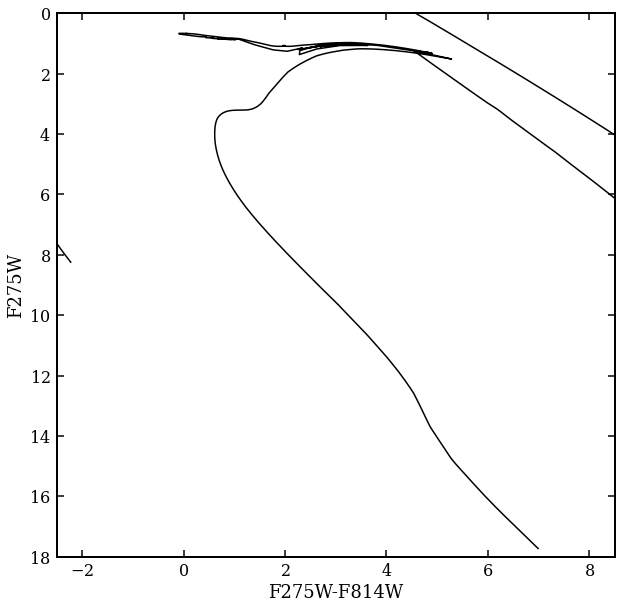

In [7]:
mask_age = (mist_age==10.05)

fig1 = figure(1,(10,10))
plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([18,0])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

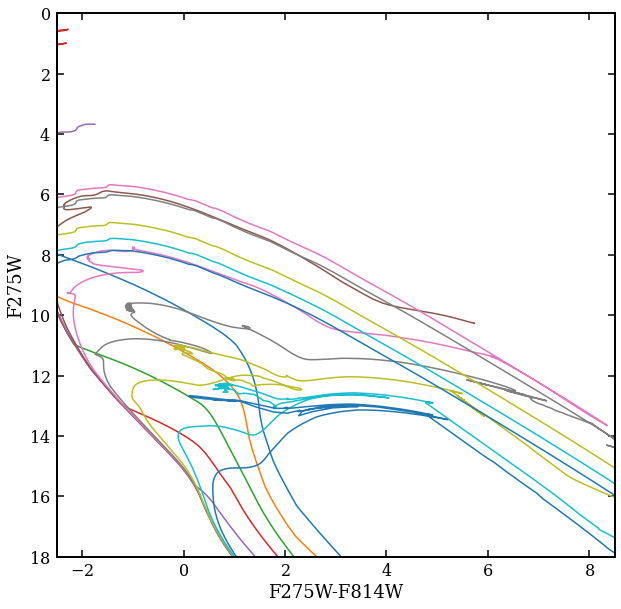

In [8]:
fig1 = figure(1,(10,10))

for age_select in np.unique(mist_age)[::10]:
    mask_age = (mist_age==age_select)

    plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age]+12.)

#plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([18,0])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_iso_minus_three.cmd
MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd


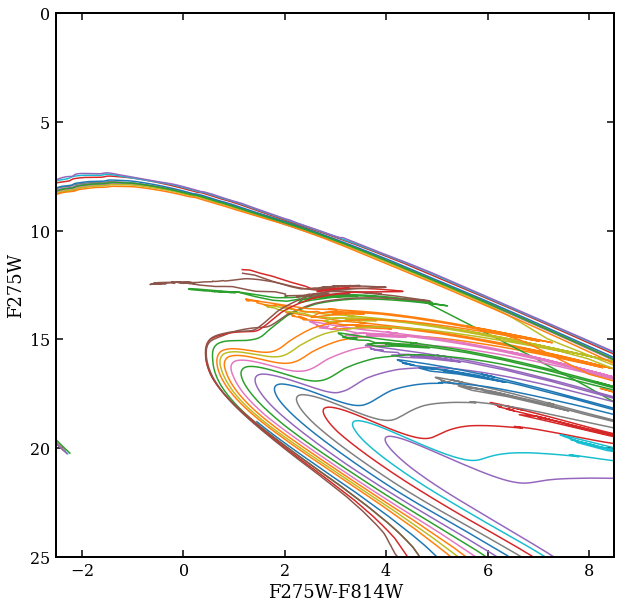

In [9]:
for mist_file in os.listdir('../MIST_isochrones/MIST_v1.2_vvcrit0.0_HST_WFC3/'):
    if mist_file.startswith('MIST'):
        print(mist_file)

        iso_test = np.loadtxt('../MIST_isochrones/MIST_v1.2_vvcrit0.0_HST_WFC3/'+mist_file)

        mist_age = iso_test[:,1]
        mist_feh_ini = iso_test[:,7]
        mist_feh = iso_test[:,8]
        mist_f275w = iso_test[:,12]
        mist_f336w = iso_test[:,15]
        mist_f438w = iso_test[:,23]
        mist_f814w = iso_test[:,47]

        fig1 = figure(1,(10,10))

        mask_age = (mist_age==10.0)

        plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age]+12.)

#plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([25,0])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd


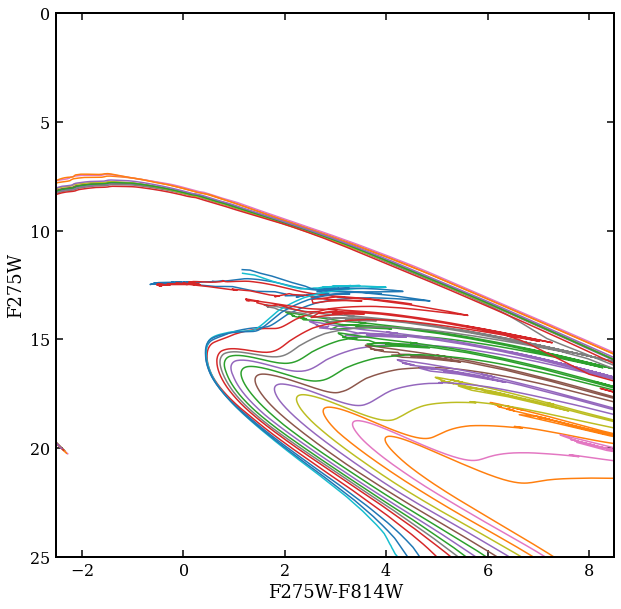

In [10]:
for mist_file in os.listdir('../MIST_isochrones/MIST_v1.2_vvcrit0.4_HST_WFC3//'):
    if mist_file.startswith('MIST'):
        print(mist_file)

        iso_test = np.loadtxt('../MIST_isochrones/MIST_v1.2_vvcrit0.4_HST_WFC3/'+mist_file)

        mist_age = iso_test[:,1]
        mist_feh_ini = iso_test[:,7]
        mist_feh = iso_test[:,8]
        mist_f275w = iso_test[:,12]
        mist_f336w = iso_test[:,15]
        mist_f438w = iso_test[:,23]
        mist_f814w = iso_test[:,47]

        fig1 = figure(1,(10,10))

        mask_age = (mist_age==10.0)

        plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age]+12.)

#plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([25,0])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

In [14]:
f = np.loadtxt('../Hugs_photometry/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt',
              dtype=object)

343134 16112 123203


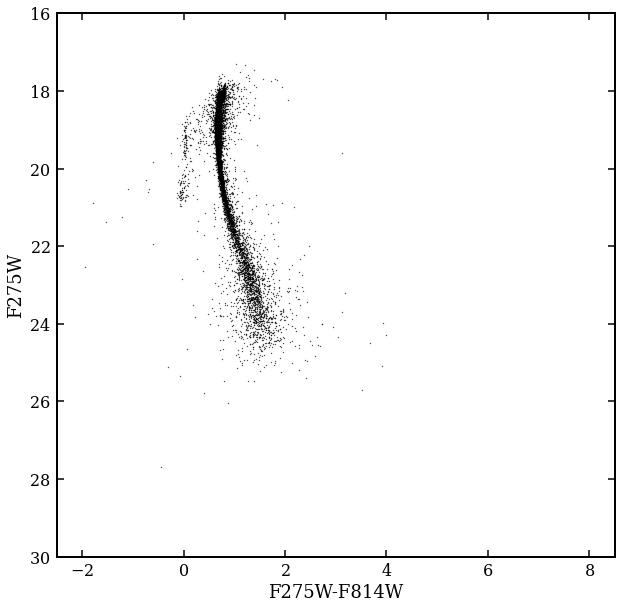

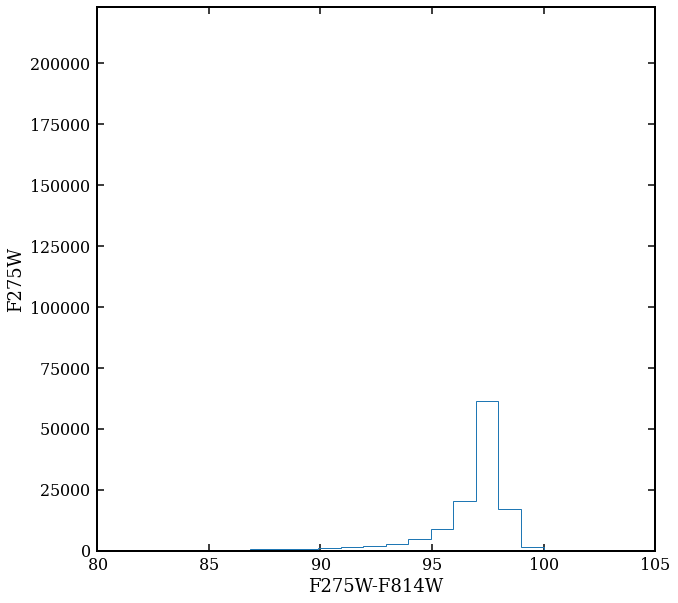

In [15]:
F275 = np.array(f[:,2],dtype=float)
F336 = np.array(f[:,8],dtype=float)
F438 = np.array(f[:,14],dtype=float)
F606 = np.array(f[:,20],dtype=float)
F814 = np.array(f[:,26],dtype=float)

F275_RMS = np.array(f[:,3],dtype=float)
F336_RMS = np.array(f[:,9],dtype=float)
F438_RMS = np.array(f[:,15],dtype=float)
F606_RMS = np.array(f[:,21],dtype=float)
F814_RMS = np.array(f[:,27],dtype=float)

membership_prob = np.array(f[:,32],dtype=float) 

#obs_mask = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(F275_RMS<0.03)&(F336_RMS<0.03)&(F438_RMS<0.02)&(membership_prob>80.0)
#obs_mask = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(F275_RMS<0.03)&(F336_RMS<0.03)&(F438_RMS<0.02)&(membership_prob>95.0)
obs_mask = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(F275_RMS<0.03)&(F336_RMS<0.03)&(F438_RMS<0.02)&(F606_RMS>0.0)&(F814_RMS>0.0)

obs_mask_no_err = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(membership_prob>80.0)
print(len(F275),np.sum(obs_mask),np.sum(obs_mask_no_err))

F275_orig = F275.copy()
F336_orig = F336.copy()
F438_orig = F438.copy()
F606_orig = F606.copy()
F814_orig = F814.copy()

F275 = F275[obs_mask]
F336 = F336[obs_mask]
F438 = F438[obs_mask]
F606 = F606[obs_mask]
F814 = F814[obs_mask]

F606_RMS = F606_RMS[obs_mask]
F814_RMS = F814_RMS[obs_mask]

fig1 = figure(1,(10,10))

#plt.scatter(F275_orig-F814_orig,F275_orig,color='C0',s=0.1)
plt.scatter(F606-F814,F814,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

fig1 = figure(2,(10,10))

#plt.scatter(F275_orig-F814_orig,F275_orig,color='C0',s=0.1)
plt.hist(membership_prob,bins=100,histtype='step')
plt.xlim([80.0,105.0])
#plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

343134 22511 201413


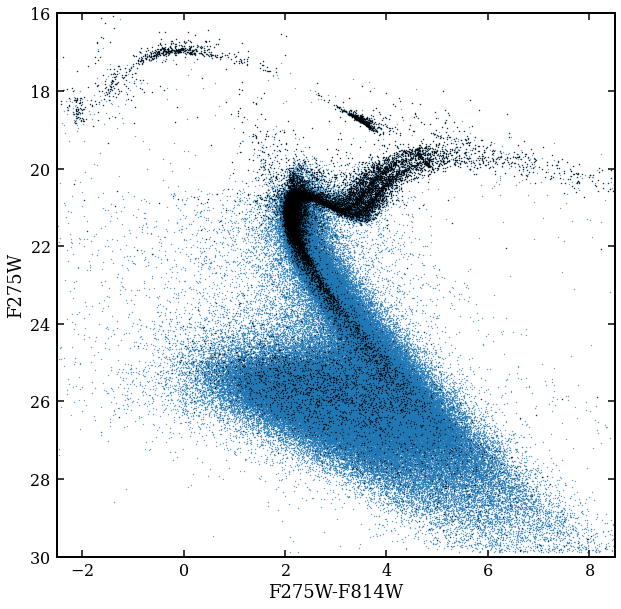

In [20]:
F275 = np.array(f[:,2],dtype=float)
F336 = np.array(f[:,8],dtype=float)
F438 = np.array(f[:,14],dtype=float)
F606 = np.array(f[:,20],dtype=float)
F814 = np.array(f[:,26],dtype=float)

F275_RMS = np.array(f[:,3],dtype=float)
F336_RMS = np.array(f[:,9],dtype=float)
F438_RMS = np.array(f[:,15],dtype=float)
F606_RMS = np.array(f[:,21],dtype=float)
F814_RMS = np.array(f[:,27],dtype=float)

membership_prob = np.array(f[:,32],dtype=float) 

#now I need to mask out the weird values (photometry set to -99.99999) and stars with
#large errors F275W > 0.03, F336W > 0.03, F438W > 0.02
obs_mask = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(F275_RMS<0.03)&(F336_RMS<0.03)&(F438_RMS<0.02)
obs_mask_no_err = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)

print(len(F275),np.sum(obs_mask),np.sum(obs_mask_no_err))

F275_orig = F275.copy()
F336_orig = F336.copy()
F438_orig = F438.copy()
F606_orig = F606.copy()
F814_orig = F814.copy()

F275 = F275[obs_mask]
F336 = F336[obs_mask]
F438 = F438[obs_mask]
F606 = F606[obs_mask]
F814 = F814[obs_mask]

fig1 = figure(1,(10,10))

#for age_select in np.unique(mist_age)[::10]:
#    mask_age = (mist_age==age_select)
#
#    plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age]+18.)

plt.scatter(F275_orig-F814_orig,F275_orig,color='C0',s=0.1)
plt.scatter(F275-F814,F275,color='k',s=0.1)
#plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
plt.xlim([-2.5,8.5])
plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

In [13]:
#This seems to be potentially the effect of reddening??, Also from the Oliviera et al. paper could need Alpha
#enhanced isochrones.



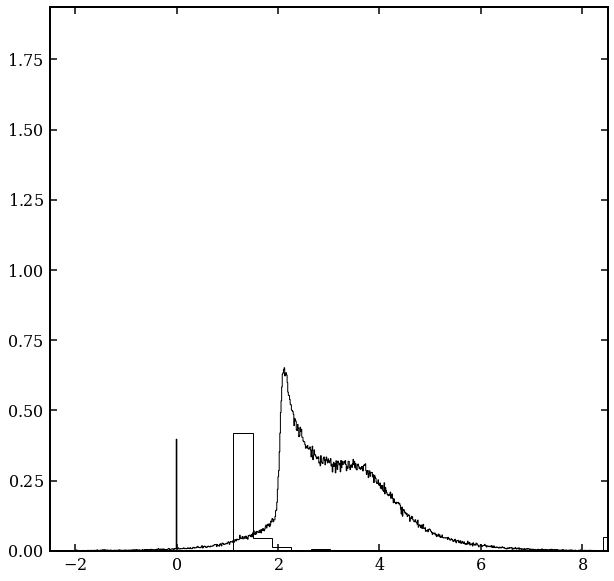

In [14]:
iso_test = np.loadtxt('../MIST_isochrones/MIST_v1.2_feh0.3_Av_3.cmd')

mist_age = iso_test[:,1]
mist_feh_ini = iso_test[:,7]
mist_feh = iso_test[:,8]
mist_f275w = iso_test[:,12]
mist_f336w = iso_test[:,15]
mist_f438w = iso_test[:,23]
mist_f814w = iso_test[:,47]


mask_age = (mist_age==10.3)
#print(np.unique(mist_age))

fig1 = figure(1,(10,10))
plt.hist(mist_f275w[mask_age]-mist_f814w[mask_age],bins=25,color='k',histtype='step',density=True)
plt.hist(F275_orig-F814_orig,bins=np.linspace(-2.0,10.0,1000),color='k',histtype='step',density=True)
plt.xlim([-2.5,8.5])
plt.show()

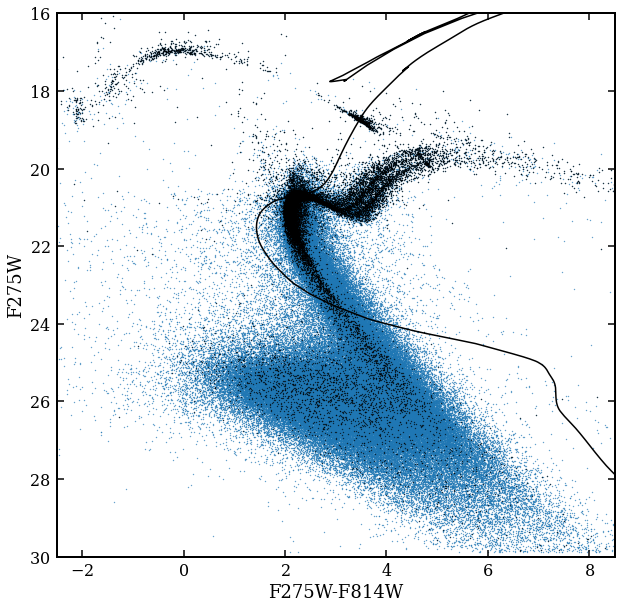

In [15]:
#Lets try out the Basti isochrones which is what the HST UV legacy survey of clusters
#used for their isochrone analysis paper

f_basti = np.loadtxt('../Basti_isochrones/FEHm105/10000z303y275p04o1d1e1.isc_wfc3')

basti_f275w = f_basti[:,6]
basti_f336w = f_basti[:,7]
basti_f438w = f_basti[:,9]
basti_f814w = f_basti[:,15]

fig1 = figure(1,(10,10))

plt.plot(basti_f275w-basti_f814w, basti_f814w+18,color='k')

plt.scatter(F275_orig-F814_orig,F275_orig,color='C0',s=0.1)
plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
plt.xlim([-2.5,8.5])
plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

In [16]:
ages_list = []

for basti_file in os.listdir('../Basti_isochrones/FEHm105/'):
    file_footer = basti_file.split('z')[1]
    ages_list.append(float(basti_file.split('z')[0])/1000.0)
    
final_ages_list = np.sort(ages_list)[::20]
print(final_ages_list)

[ 0.9  2.8  4.8  6.8  8.8 10.8 12.8 14.8 16.8 18.8 20.8]


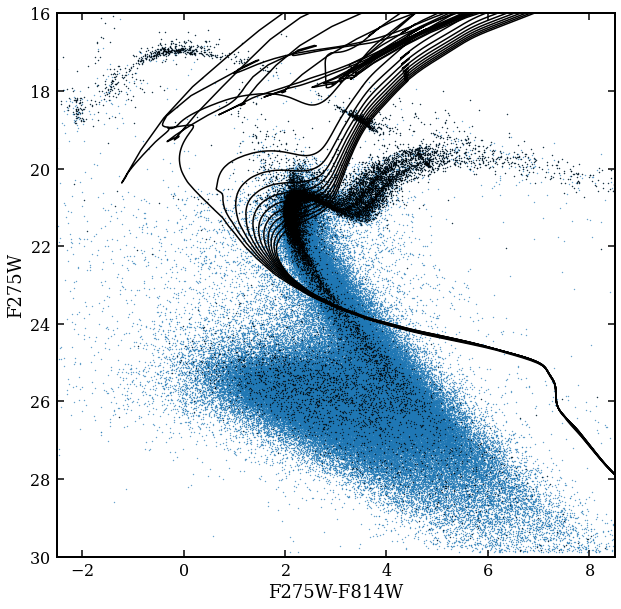

In [17]:
fig1 = figure(1,(10,10))

for age_value in final_ages_list:
    file_name = str(int(age_value*1000.))+'z'+file_footer
    
    f_basti = np.loadtxt('../Basti_isochrones/FEHm105/'+file_name)

    basti_f275w = f_basti[:,6]
    basti_f336w = f_basti[:,7]
    basti_f438w = f_basti[:,9]
    basti_f814w = f_basti[:,15]
    
    plt.plot(basti_f275w-basti_f814w, basti_f814w+18,color='k')

plt.scatter(F275_orig-F814_orig,F275_orig,color='C0',s=0.1)
plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
plt.xlim([-2.5,8.5])
plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

6000z0027800y275P04O1D1E1.isc_wfc3
2000z0027800y275P04O1D1E1.isc_wfc3
11000z0027800y275P04O1D1E1.isc_wfc3
9000z0027800y275P04O1D1E1.isc_wfc3
5000z0027800y275P04O1D1E1.isc_wfc3
12000z0027800y275P04O1D1E1.isc_wfc3
1000z0027800y275P04O1D1E1.isc_wfc3
10000z0027800y275P04O1D1E1.isc_wfc3
3000z0027800y275P04O1D1E1.isc_wfc3
14000z0027800y275P04O1D1E1.isc_wfc3
7000z0027800y275P04O1D1E1.isc_wfc3
13000z0027800y275P04O1D1E1.isc_wfc3
4000z0027800y275P04O1D1E1.isc_wfc3
8000z0027800y275P04O1D1E1.isc_wfc3


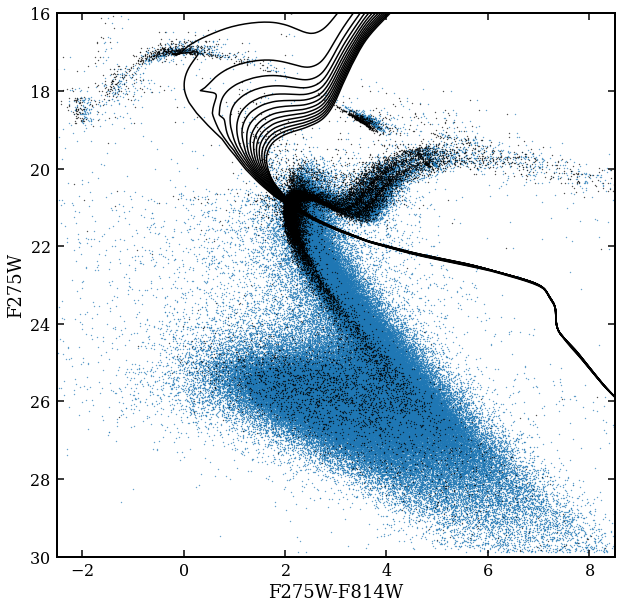

In [18]:
fig1 = figure(1,(10,10))

for basti_file in os.listdir('../Basti_isochrones/FEHm2em3/'):
    print(basti_file)
    
    f_basti = np.loadtxt('../Basti_isochrones/FEHm2em3/'+basti_file)

    basti_f275w = f_basti[:,6]
    basti_f336w = f_basti[:,7]
    basti_f438w = f_basti[:,9]
    basti_f606w = f_basti[:,12]
    basti_f814w = f_basti[:,15]
    
    plt.plot(basti_f275w-basti_f814w, basti_f814w+16,color='k')

plt.scatter(F275_orig-F814_orig+0.15,F275_orig,color='C0',s=0.1)
plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
plt.xlim([-2.5,8.5])
plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

6000z0027800y275P04O1D1E1.isc_wfc3
2000z0027800y275P04O1D1E1.isc_wfc3
11000z0027800y275P04O1D1E1.isc_wfc3
9000z0027800y275P04O1D1E1.isc_wfc3
5000z0027800y275P04O1D1E1.isc_wfc3
12000z0027800y275P04O1D1E1.isc_wfc3
1000z0027800y275P04O1D1E1.isc_wfc3
10000z0027800y275P04O1D1E1.isc_wfc3
3000z0027800y275P04O1D1E1.isc_wfc3
14000z0027800y275P04O1D1E1.isc_wfc3
7000z0027800y275P04O1D1E1.isc_wfc3
13000z0027800y275P04O1D1E1.isc_wfc3
4000z0027800y275P04O1D1E1.isc_wfc3
8000z0027800y275P04O1D1E1.isc_wfc3


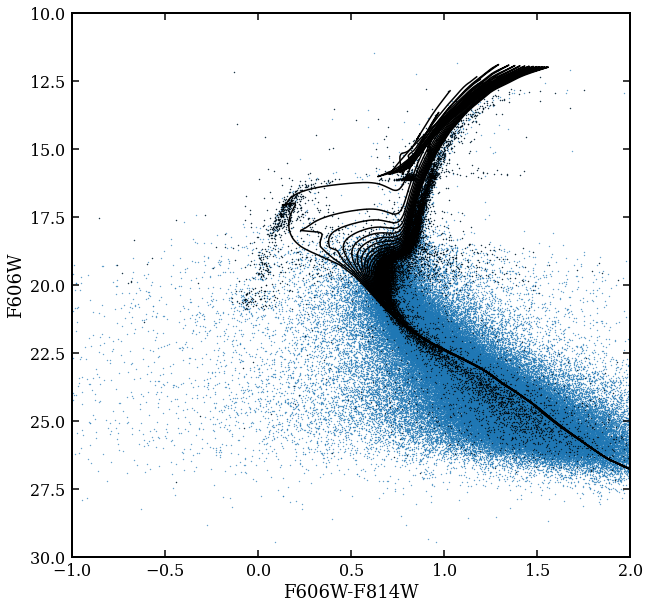

In [120]:
#In the isochrone fit paper they use f606 and f814 so maybe I should look at that too?

fig1 = figure(1,(10,10))

for basti_file in os.listdir('../Basti_isochrones/FEHm2em3/'):
    print(basti_file)
    
    f_basti = np.loadtxt('../Basti_isochrones/FEHm2em3/'+basti_file)

    basti_f275w = f_basti[:,6]
    basti_f336w = f_basti[:,7]
    basti_f438w = f_basti[:,9]
    basti_f606w = f_basti[:,12]
    basti_f814w = f_basti[:,15]
    
    plt.plot((basti_f606w-basti_f814w)+0.15, basti_f814w+16,color='k')

plt.scatter(F606_orig-F814_orig,F606_orig,color='C0',s=0.1)
plt.scatter(F606-F814,F606,color='k',s=0.1)
#plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.xlim([0.4,1.2])
#plt.ylim([22,15])

plt.xlim([-1.0,2.0])
plt.ylim([30,10])

plt.xlabel('F606W-F814W')
plt.ylabel('F606W')
plt.show()

## From the Souza paper

The background bayesian statistics is given by the proability law

$$ P(M,D|) = P(M|D,H) \times P(D|H) $$

Here M is the model, D is the data, and H is the null hypothesis.

So from Bayes' theorem we have:

$$ P(M|D) = \frac{P(D|M) \times P(M)}{P(D)} $$

They assume colors and magnitudes are drawn from a Gaussian:

$$\Large{ P(D|M) = \prod_{i}^{N}\prod_{j}^{M} e^{-\phi^{2}_{color}} e^{-\phi^{2}_{Mag}} }$$

This part always confused the hell out of me, because my understanding of P(D|M) is the probability of the data given the model, in this case the model would be star formation / evolution. so why would this be a gaussian???

Where N is the total number of analyzed stars and M is the number of points on the isochrone

Each of the exponents of the Gaussian is defined as:

$$ \Large{ \phi^{2}_{color_{i,j}} = \frac{1}{2} \Big( \frac{color^{obs}_{i}-color^{iso}_{j}}{S_{i}+\sigma^{Cor}_{i}} \Big)^{2} } $$

Here you are finding the distance between every observed point and every point on the isochrone

And $S_{i}$ is the entropy term of the likelihood and There's also some sort of correlation function.

Now the likelihood (in logrithmic form) is given by:

$$ \Large \it{L} = max \Big( - \sum_{i = 1}^{N} \sum_{j = 1}^{M} \big[ \phi^{2}_{color_{i,j}} + \phi^{2}_{mag_{i,j}} \big] \Big) $$

We want to work in the log because the exponential tends to blow-up:

$$ \Large ln P(M|D) = ln P(M) + \it{L} $$

Here P(M) are the priors, which according to the paper are priors on the upper age limit of the universe, the metallicty of the stars, distances, He abundances, and reddening values

Okay so the apply Bayes' theorem with the Metropolis-Hastings algorithm this algorithm was originally applied to statistical physics to describe a system trying to reach minimum energy.

** For reasons I don't understand, using the MH algorithm allows us to ignore the normalization term in Bayes' theorem  P(D) **

When applied to random distributions this is what leads to a MCMC

So to find the probability distirbution of a parameter you integrate over the Likelihood times the prior?

$$ \Large P(\phi) = \int \it{L}(\phi) \times p(\phi) d\phi $$

In [20]:
len(F606_orig), len(F606)

(343134, 22511)

In [43]:
#So in practice what does this look like?
#Seems like the likelihood is easy enough to calcuate given that I can understand what Si
#sigma are.
#
#Okay I think I'm just going to code a maximum likelihood here:
#
#What do I actually do?
# 1) I need to find the closest point between each point and every isochrone
# 2) plug that into the liklihood equation
#
# 
from scipy.spatial.distance import cdist

orig_matrix = np.vstack([F606-F814,F606]).T
iso_matrix = np.vstack([(basti_f606w-basti_f814w)+0.15,basti_f606w+16]).T

chi_color_list, chi_mag_list = [],[]

for ii in range(len(F606)-1):
    #mag_select = F606_orig[ii]
    #color_select = F606_orig[ii]-F814_orig[ii]
    
    if ii%100 == 0:
        print(ii)
    
    cmd_arg = np.argmin(np.linalg.norm(orig_matrix[ii]-iso_matrix))
    
    chi_mag = orig_matrix[ii][1] - iso_matrix[cmd_arg][1]
    chi_color = orig_matrix[ii][0] - iso_matrix[cmd_arg][0]

    chi_color_list.append(chi_color)
    chi_mag_list.append(chi_mag)
    
#cmd_dist = cdist(orig_matrix,iso_matrix) #This is incredibly slow and difficult to run
#print(cmd_dist)

#plt.scatter(F606_orig-F814_orig,F606_orig,color='C0',s=0.1)
#plt.scatter(F606-F814,F606,color='k',s=0.1)

#def iso_likelihood(mag_data, color_data, mag_iso, color_iso):
#    from scipy.spatial.distance import cdist
    
#    data_matrix = np.vstack(color_data, mag_data).T
#    iso_matrix = np.vstack(color_iso, mag_iso).T
#    chi_mag = 

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [44]:
#Okay so I've computed the chi's here
#technically the chi's include the error, but I'm assuming they're zero for this test

Likelihood = -np.sum(np.array(chi_mag_list)**2+np.array(chi_color_list)**2)
print(Likelihood)

-2620845.019766759


In [53]:
#This seems to work, the liklihood is very low. Let's put this all together
#and make a simple loop over all the isochrones:

Likelihood_max = -np.inf
basti_color_final = None
basti_mag_final = None

orig_matrix = np.vstack([F606-F814,F606]).T

for basti_file in os.listdir('../Basti_isochrones/FEHm2em3/'):
    print(basti_file)
    
    f_basti = np.loadtxt('../Basti_isochrones/FEHm2em3/'+basti_file)

    basti_f275w = f_basti[:,6]
    basti_f336w = f_basti[:,7]
    basti_f438w = f_basti[:,9]
    basti_f606w = f_basti[:,12]
    basti_f814w = f_basti[:,15]
    
    iso_matrix = np.vstack([(basti_f606w-basti_f814w)+0.15,basti_f606w+16]).T

    chi_color_list, chi_mag_list = [],[]

    for ii in range(len(F606)-1):
        #mag_select = F606_orig[ii]
        #color_select = F606_orig[ii]-F814_orig[ii]

        cmd_arg = np.argmin(np.linalg.norm(orig_matrix[ii]-iso_matrix))
        #print(cmd_arg)

        #print(orig_matrix[ii])
        chi_mag = orig_matrix[cmd_arg][1] - iso_matrix[cmd_arg][1]
        chi_color = orig_matrix[cmd_arg][0] - iso_matrix[cmd_arg][0]

        chi_color_list.append(chi_color)
        chi_mag_list.append(chi_mag)
    Likelihood = -np.sum(np.array(chi_mag_list)**2+np.array(chi_color_list)**2)
    
    if Likelihood > Likelihood_max:
        Likelihood_max = Likelihood
        
        basti_color_final = iso_matrix[:,0]
        basti_mag_final = iso_matrix[:,1]
        
    print(Likelihood)

6000z0027800y275P04O1D1E1.isc_wfc3
-1950668.8920029986
2000z0027800y275P04O1D1E1.isc_wfc3
-1750830.65560416
11000z0027800y275P04O1D1E1.isc_wfc3
-1952036.5657185896
9000z0027800y275P04O1D1E1.isc_wfc3
-1951566.2169314995
5000z0027800y275P04O1D1E1.isc_wfc3
-1917312.4637261387
12000z0027800y275P04O1D1E1.isc_wfc3
-1952231.9883034788
1000z0027800y275P04O1D1E1.isc_wfc3
-1634359.2037164585
10000z0027800y275P04O1D1E1.isc_wfc3
-1951797.9434967006
3000z0027800y275P04O1D1E1.isc_wfc3
-1822768.7441262007
14000z0027800y275P04O1D1E1.isc_wfc3
-1952818.3169964298
7000z0027800y275P04O1D1E1.isc_wfc3
-1951023.28329831
13000z0027800y275P04O1D1E1.isc_wfc3
-1952543.308842749
4000z0027800y275P04O1D1E1.isc_wfc3
-1875481.0308499197
8000z0027800y275P04O1D1E1.isc_wfc3
-1951334.5043750983


-1634359.2037164585


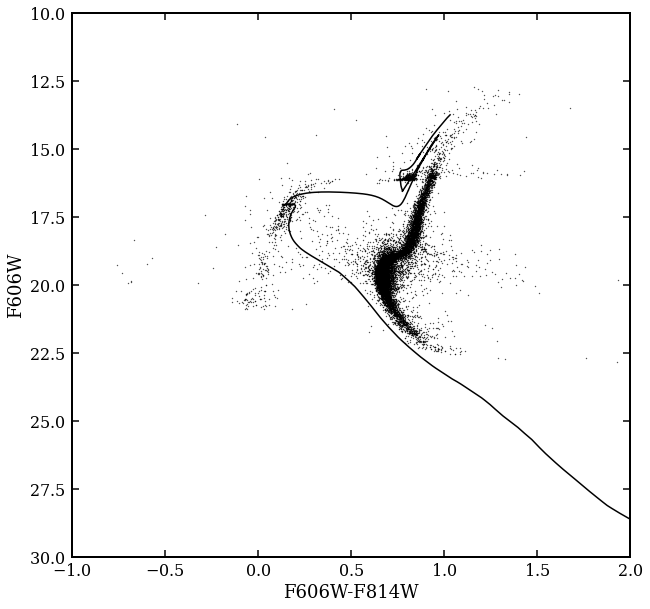

[2.6401 2.628  2.6161 ... 1.1962 1.2071 1.2178] [30.452  30.4229 30.394  ... 13.8522 13.8091 13.7655]
12.715 22.8284
11.5334 21.4915


In [56]:
print(Likelihood_max)

fig1 = figure(1,(10,10))

plt.plot(basti_color_final,basti_mag_final,color='k')

plt.scatter(F606-F814,F606,color='k',s=0.1)
#plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.xlim([0.4,1.2])
#plt.ylim([22,15])

plt.xlim([-1.0,2.0])
plt.ylim([30,10])

plt.xlabel('F606W-F814W')
plt.ylabel('F606W')
plt.show()

print(iso_matrix[:,0],iso_matrix[:,1])
print(np.min(F606),np.max(F606))
print(np.min(F814),np.max(F814))

## Various Likelihood tests:

Okay the Likelihood tests doesn't really seem to work correctly, I've tried a few things
that don't seem to fix it:

1) adding in a membership probability cut (80% and 95%)

2) cutting out the clump of stars w/ colors < 0.4

Other tests I want to do:

1) cutting the isochrones below 22.5 mags

2) Interpoplating the isochrone so that there is a uniform density of points throughout CMD space

Let's try that first one

In [116]:
#CUTTING THE ISOCHRONE

#This seems to work, the liklihood is very low. Let's put this all together
#and make a simple loop over all the isochrones:

Likelihood_max = -np.inf
Likelihood_min = 0.0
basti_color_final = None
basti_mag_final = None

basti_color_min = None
basti_mag_min = None

orig_matrix = np.vstack([F606-F814,F606]).T

for basti_file in os.listdir('../Basti_isochrones/FEHm2em3/'):
    print(basti_file)
    
    f_basti = np.loadtxt('../Basti_isochrones/FEHm2em3/'+basti_file)

    basti_f606w = f_basti[:,12]
    
    print(np.max(basti_f606w))
    
    isochrone_cut = (basti_f606w<22.5-16.0)
    
    basti_f275w = f_basti[:,6][isochrone_cut]
    basti_f336w = f_basti[:,7][isochrone_cut]
    basti_f438w = f_basti[:,9][isochrone_cut]
    basti_f606w = f_basti[:,12][isochrone_cut]
    basti_f814w = f_basti[:,15][isochrone_cut]
    
    print(len(basti_f606w))
    
    iso_matrix = np.vstack([(basti_f606w-basti_f814w)+0.15,basti_f606w+16]).T

    chi_color_list, chi_mag_list = [],[]

    for ii in range(len(F606)-1):
        cmd_arg = np.argmin(np.linalg.norm(orig_matrix[ii]-iso_matrix))
        #print(cmd_arg)

        #print(orig_matrix[ii])
        chi_mag = orig_matrix[cmd_arg][1] - iso_matrix[cmd_arg][1]
        chi_color = orig_matrix[cmd_arg][0] - iso_matrix[cmd_arg][0]

        chi_color_list.append(chi_color)
        chi_mag_list.append(chi_mag)
        
    assert shape(chi_mag_list)==shape(np.array(chi_mag_list)**2.0)
        
    Likelihood = -np.sum(np.array(chi_mag_list)**2+np.array(chi_color_list)**2)
    
    if Likelihood > Likelihood_max:
        Likelihood_max = Likelihood
        
        basti_color_final = (basti_f606w-basti_f814w)+0.15
        basti_mag_final = basti_f606w+16
        
    if Likelihood < Likelihood_min:
        Likelihood_min = Likelihood
        
        basti_color_min = (basti_f606w-basti_f814w)+0.15
        basti_mag_min = basti_f606w+16
        
    print(Likelihood)

6000z0027800y275P04O1D1E1.isc_wfc3
14.4503
1856
-128364.41423110005
2000z0027800y275P04O1D1E1.isc_wfc3
13.9181
1904
-124690.90941260014
11000z0027800y275P04O1D1E1.isc_wfc3
14.4538
1827
-127691.35982870011
9000z0027800y275P04O1D1E1.isc_wfc3
14.4526
1837
-128643.32866300017
5000z0027800y275P04O1D1E1.isc_wfc3
14.3636
1864
-128404.53312880034
12000z0027800y275P04O1D1E1.isc_wfc3
14.4543
1823
-128104.97657669988
1000z0027800y275P04O1D1E1.isc_wfc3
13.5926
1939
-121275.46688750014
10000z0027800y275P04O1D1E1.isc_wfc3
14.4532
1831
-125908.41656150005
3000z0027800y275P04O1D1E1.isc_wfc3
14.1133
1884
-127096.79937200034
14000z0027800y275P04O1D1E1.isc_wfc3
14.4558
1815
-126150.94560430023
7000z0027800y275P04O1D1E1.isc_wfc3
14.4512
1849
-128475.20755070019
13000z0027800y275P04O1D1E1.isc_wfc3
14.4551
1819
-127391.48093340002
4000z0027800y275P04O1D1E1.isc_wfc3
14.2537
1873
-127175.9233726001
8000z0027800y275P04O1D1E1.isc_wfc3
14.452
1842
-125828.77550620021


-121275.46688750014


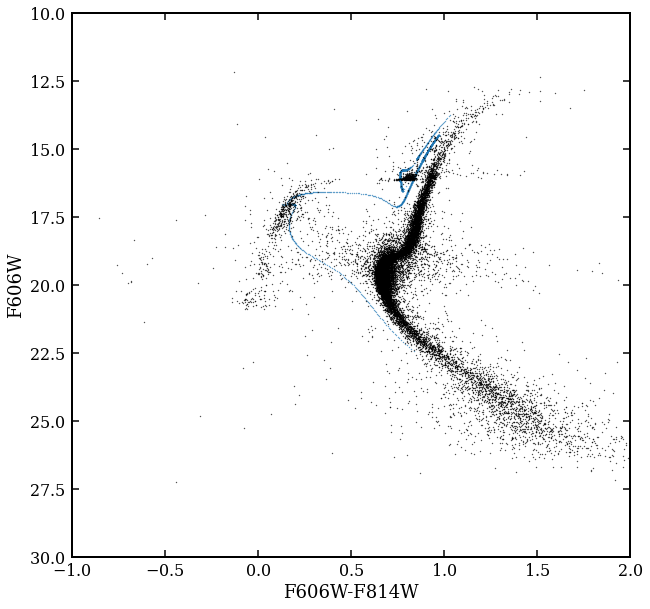

[0.8488 0.843  0.8372 ... 1.1962 1.2071 1.2178] [22.4723 22.4381 22.4038 ... 13.8522 13.8091 13.7655]
12.1638 29.2177
10.8173 27.6776


In [117]:
print(Likelihood_max)

fig1 = figure(1,(10,10))

plt.scatter(basti_color_final,basti_mag_final,color='C0',s=0.1)
#plt.scatter(basti_color_min,basti_mag_min,color='C1',s=0.1)

plt.scatter(F606-F814,F606,color='k',s=0.1)
#plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.xlim([0.4,1.2])
#plt.ylim([22,15])

plt.xlim([-1.0,2.0])
plt.ylim([30,10])

plt.xlabel('F606W-F814W')
plt.ylabel('F606W')
plt.show()

print(iso_matrix[:,0],iso_matrix[:,1])
print(np.min(F606),np.max(F606))
print(np.min(F814),np.max(F814))

In [110]:
#simplify the algorithms

Likelihood_max = -np.inf
Likelihood_min = 0.0
basti_color_final = None
basti_mag_final = None

basti_color_min = None
basti_mag_min = None

orig_matrix = np.vstack([F606-F814,F606]).T

for basti_file in os.listdir('../Basti_isochrones/FEHm2em3/'):
    print(basti_file)
    
    f_basti = np.loadtxt('../Basti_isochrones/FEHm2em3/'+basti_file)
    
    basti_f275w = f_basti[:,6]
    basti_f336w = f_basti[:,7]
    basti_f438w = f_basti[:,9]
    basti_f606w = f_basti[:,12]
    basti_f814w = f_basti[:,15]
    
    basti_color = (basti_f606w-basti_f814w)+0.15
    basti_mag = basti_f606w+16.

    chi_color_list, chi_mag_list = [],[]

    for ii in range(len(F606)-1):
        
        obs_cmd_mag = F606[ii]
        obs_cmd_color = F606[ii]-F814[ii]
        
        obs_cmd_mag_err = F606_RMS[ii]
        obs_cmd_color_err = np.sqrt(F606_RMS[ii]**2.0+F814_RMS[ii]**2.0)
        
        cmd_dist = np.sqrt((basti_color-(obs_cmd_color))**2.0+(basti_mag-obs_cmd_mag)**2.0) #distance between observed point and isochrone points
        cmd_arg = np.argmin(cmd_dist) #find the point on the 
        chi_mag = (obs_cmd_mag - basti_mag[cmd_arg])/obs_cmd_color_err
        chi_color = (obs_cmd_color - basti_color[cmd_arg])/obs_cmd_color_err

        chi_color_list.append(chi_color)
        chi_mag_list.append(chi_mag)
        
    assert shape(chi_mag_list)==shape(np.array(chi_mag_list)**2.0)
        
    Likelihood = -np.sum(np.array(chi_mag_list)**2+np.array(chi_color_list)**2)
    
    if Likelihood > Likelihood_max:
        Likelihood_max = Likelihood
        
        basti_color_final = basti_color
        basti_mag_final = basti_mag
        
    if Likelihood < Likelihood_min:
        Likelihood_min = Likelihood
        
        basti_color_min = basti_color
        basti_mag_min = basti_mag
        
    print(Likelihood)

6000z0027800y275P04O1D1E1.isc_wfc3
-4995583.087298301
2000z0027800y275P04O1D1E1.isc_wfc3
-18057969.92606829
11000z0027800y275P04O1D1E1.isc_wfc3
-2949057.603311437
9000z0027800y275P04O1D1E1.isc_wfc3
-2869602.962673381
5000z0027800y275P04O1D1E1.isc_wfc3
-7286174.488862479
12000z0027800y275P04O1D1E1.isc_wfc3
-3114642.9405942825
1000z0027800y275P04O1D1E1.isc_wfc3
-22584445.964462124
10000z0027800y275P04O1D1E1.isc_wfc3
-2829954.4117879397
3000z0027800y275P04O1D1E1.isc_wfc3
-14063012.682821525
14000z0027800y275P04O1D1E1.isc_wfc3
-3537264.176313892
7000z0027800y275P04O1D1E1.isc_wfc3
-3737400.892546923
13000z0027800y275P04O1D1E1.isc_wfc3
-3318789.699347601
4000z0027800y275P04O1D1E1.isc_wfc3
-10704407.47188129
8000z0027800y275P04O1D1E1.isc_wfc3
-3128174.051240277


-2829954.4117879397 -22584445.964462124


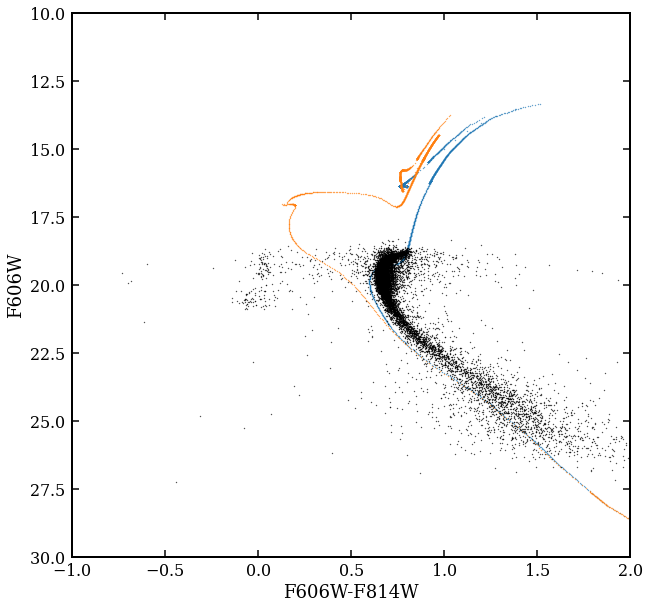

In [111]:
fig1 = figure(1,(10,10))

print(Likelihood_max,Likelihood_min)

plt.scatter(basti_color_final,basti_mag_final,color='C0',s=0.1)
plt.scatter(basti_color_min,basti_mag_min,color='C1',s=0.1)

plt.scatter(F606-F814,F606,color='k',s=0.1)
#plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.xlim([0.4,1.2])
#plt.ylim([22,15])

plt.xlim([-1.0,2.0])
plt.ylim([30,10])

plt.xlabel('F606W-F814W')
plt.ylabel('F606W')
plt.show()

#print(iso_matrix[:,0],iso_matrix[:,1])
#print(np.min(F606),np.max(F606))
#print(np.min(F814),np.max(F814))

In [112]:
F275 = np.array(f[:,2],dtype=float)
F336 = np.array(f[:,8],dtype=float)
F438 = np.array(f[:,14],dtype=float)
F606 = np.array(f[:,20],dtype=float)
F814 = np.array(f[:,26],dtype=float)

F275_RMS = np.array(f[:,3],dtype=float)
F336_RMS = np.array(f[:,9],dtype=float)
F438_RMS = np.array(f[:,15],dtype=float)
F606_RMS = np.array(f[:,21],dtype=float)
F814_RMS = np.array(f[:,27],dtype=float)

membership_prob = np.array(f[:,32],dtype=float) 

#obs_mask = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(F275_RMS<0.03)&(F336_RMS<0.03)&(F438_RMS<0.02)&(membership_prob>80.0)
#obs_mask = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(F275_RMS<0.03)&(F336_RMS<0.03)&(F438_RMS<0.02)&(membership_prob>95.0)
obs_mask = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(F275_RMS<0.03)&(F336_RMS<0.03)&(F438_RMS<0.02)

obs_mask_no_err = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(membership_prob>80.0)
print(len(F275),np.sum(obs_mask),np.sum(obs_mask_no_err))

F275_orig = F275.copy()
F336_orig = F336.copy()
F438_orig = F438.copy()
F606_orig = F606.copy()
F814_orig = F814.copy()

F275 = F275[obs_mask]
F336 = F336[obs_mask]
F438 = F438[obs_mask]
F606 = F606[obs_mask]
F814 = F814[obs_mask]

F606_RMS = F606_RMS[obs_mask]
F814_RMS = F814_RMS[obs_mask]

343134 22511 123203


In [118]:
#simplify the algorithms

Likelihood_max = -np.inf
Likelihood_min = 0.0
basti_color_final = None
basti_mag_final = None

basti_color_min = None
basti_mag_min = None

orig_matrix = np.vstack([F606-F814,F606]).T

for basti_file in os.listdir('../Basti_isochrones/FEHm2em3/'):
    print(basti_file)
    
    f_basti = np.loadtxt('../Basti_isochrones/FEHm2em3/'+basti_file)
    
    basti_f275w = f_basti[:,6]
    basti_f336w = f_basti[:,7]
    basti_f438w = f_basti[:,9]
    basti_f606w = f_basti[:,12]
    basti_f814w = f_basti[:,15]
    
    basti_color = (basti_f606w-basti_f814w)+0.15
    basti_mag = basti_f606w+16.

    chi_color_list, chi_mag_list = [],[]

    for ii in range(len(F606)-1):
        
        obs_cmd_mag = F606[ii]
        obs_cmd_color = F606[ii]-F814[ii]
        
        #obs_cmd_mag_err = F606_RMS[ii]
        #obs_cmd_color_err = np.sqrt(F606_RMS[ii]**2.0+F814_RMS[ii]**2.0)
        
        cmd_dist = np.sqrt((basti_color-(obs_cmd_color))**2.0+(basti_mag-obs_cmd_mag)**2.0) #distance between observed point and isochrone points
        cmd_arg = np.argmin(cmd_dist) #find the point on the 
        chi_mag = (obs_cmd_mag - basti_mag[cmd_arg])
        chi_color = (obs_cmd_color - basti_color[cmd_arg])

        chi_color_list.append(chi_color)
        chi_mag_list.append(chi_mag)
        
    assert shape(chi_mag_list)==shape(np.array(chi_mag_list)**2.0)
        
    Likelihood = -np.sum(np.array(chi_mag_list)**2+np.array(chi_color_list)**2)
    
    if Likelihood > Likelihood_max:
        Likelihood_max = Likelihood
        
        basti_color_final = basti_color
        basti_mag_final = basti_mag
        
    if Likelihood < Likelihood_min:
        Likelihood_min = Likelihood
        
        basti_color_min = basti_color
        basti_mag_min = basti_mag
        
    print(Likelihood)

6000z0027800y275P04O1D1E1.isc_wfc3
-924.9304853800002
2000z0027800y275P04O1D1E1.isc_wfc3
-1665.7496058599993
11000z0027800y275P04O1D1E1.isc_wfc3
-803.0205353600002
9000z0027800y275P04O1D1E1.isc_wfc3
-804.45241646
5000z0027800y275P04O1D1E1.isc_wfc3
-1036.3351711399998
12000z0027800y275P04O1D1E1.isc_wfc3
-810.70584683
1000z0027800y275P04O1D1E1.isc_wfc3
-2456.835622599999
10000z0027800y275P04O1D1E1.isc_wfc3
-799.9411028100001
3000z0027800y275P04O1D1E1.isc_wfc3
-1379.3114009299998
14000z0027800y275P04O1D1E1.isc_wfc3
-824.63401983
7000z0027800y275P04O1D1E1.isc_wfc3
-855.03651838
13000z0027800y275P04O1D1E1.isc_wfc3
-821.07768684
4000z0027800y275P04O1D1E1.isc_wfc3
-1196.04455418
8000z0027800y275P04O1D1E1.isc_wfc3
-819.23736777


-799.9411028100001 -2456.835622599999


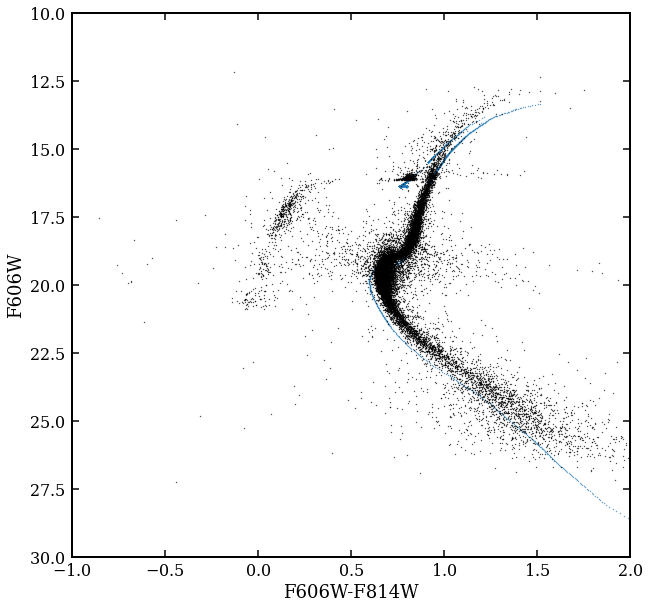

In [119]:
fig1 = figure(1,(10,10))

print(Likelihood_max,Likelihood_min)

plt.scatter(basti_color_final,basti_mag_final,color='C0',s=0.1)
#plt.scatter(basti_color_min,basti_mag_min,color='C1',s=0.1)

plt.scatter(F606-F814,F606,color='k',s=0.1)
#plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.xlim([0.4,1.2])
#plt.ylim([22,15])

plt.xlim([-1.0,2.0])
plt.ylim([30,10])

plt.xlabel('F606W-F814W')
plt.ylabel('F606W')
plt.show()

#print(iso_matrix[:,0],iso_matrix[:,1])
#print(np.min(F606),np.max(F606))
#print(np.min(F814),np.max(F814))

In [29]:
import re
print(basti_file)
print(basti_folder)

split_test = re.split('z|y|O',basti_file)
age_test = float(split_test[0])/1000.0
Z_test = float('0.'+split_test[1])
print(age_test,Z_test)

7000z0015700y275P04O1D1E1.isc_wfc3
FEHm130
7.0 0.00157


In [30]:
#Okay now that it works I'm going to loop over all times and metallicities
#simplify the algorithms

Likelihood_max = -np.inf
Likelihood_min = 0.0
basti_color_final = None
basti_mag_final = None

basti_color_min = None
basti_mag_min = None

basti_file_final = None

for basti_folder in os.listdir('../Basti_isochrones/'): 
    if basti_folder.startswith('FEH'):
        print(basti_folder)
        for basti_file in os.listdir('../Basti_isochrones/'+str(basti_folder)):
            print(basti_file)

            f_basti = np.loadtxt('../Basti_isochrones/'+str(basti_folder)+'/'+basti_file)

            basti_f275w = f_basti[:,6]
            basti_f336w = f_basti[:,7]
            basti_f438w = f_basti[:,9]
            basti_f606w = f_basti[:,12]
            basti_f814w = f_basti[:,15]

            basti_color = (basti_f606w-basti_f814w)+0.15
            basti_mag = basti_f606w+16.

            chi_color_list, chi_mag_list = [],[]

            for ii in range(len(F606)-1):

                obs_cmd_mag = F606[ii]
                obs_cmd_color = F606[ii]-F814[ii]

                #obs_cmd_mag_err = F606_RMS[ii]
                #obs_cmd_color_err = np.sqrt(F606_RMS[ii]**2.0+F814_RMS[ii]**2.0)

                cmd_dist = np.sqrt((basti_color-(obs_cmd_color))**2.0+(basti_mag-obs_cmd_mag)**2.0) #distance between observed point and isochrone points
                cmd_arg = np.argmin(cmd_dist) #find the point on the 
                chi_mag = (obs_cmd_mag - basti_mag[cmd_arg])
                chi_color = (obs_cmd_color - basti_color[cmd_arg])

                chi_color_list.append(chi_color)
                chi_mag_list.append(chi_mag)

            assert shape(chi_mag_list)==shape(np.array(chi_mag_list)**2.0)

            Likelihood = -np.sum(np.array(chi_mag_list)**2+np.array(chi_color_list)**2)

            if Likelihood > Likelihood_max:
                Likelihood_max = Likelihood

                basti_color_final = basti_color
                basti_mag_final = basti_mag
                
                basti_file_final = basti_file

            if Likelihood < Likelihood_min:
                Likelihood_min = Likelihood

                basti_color_min = basti_color
                basti_mag_min = basti_mag

            print(Likelihood)
        print('done')

FEHm090
3000z0039200y275P04O1D1E1.isc_wfc3
-1177.7123982900002
10000z0039200y275P04O1D1E1.isc_wfc3
-821.965571
7000z0039200y275P04O1D1E1.isc_wfc3
-820.9063165100001
14000z0039200y275P04O1D1E1.isc_wfc3
-890.4086829000001
8000z0039200y275P04O1D1E1.isc_wfc3
-807.48622946
13000z0039200y275P04O1D1E1.isc_wfc3
-872.7113809200002
4000z0039200y275P04O1D1E1.isc_wfc3
-1055.1333384099999
6000z0039200y275P04O1D1E1.isc_wfc3
-858.58633958
11000z0039200y275P04O1D1E1.isc_wfc3
-836.9370379100001
2000z0039200y275P04O1D1E1.isc_wfc3
-1444.7935984899998
5000z0039200y275P04O1D1E1.isc_wfc3
-932.0185304000001
1000z0039200y275P04O1D1E1.isc_wfc3
-2184.0237831899994
12000z0039200y275P04O1D1E1.isc_wfc3
-854.5411556800002
9000z0039200y275P04O1D1E1.isc_wfc3
-810.3876045500001
done
FEHm2em3
6000z0027800y275P04O1D1E1.isc_wfc3
-924.9304853800002
2000z0027800y275P04O1D1E1.isc_wfc3
-1665.7496058599993
11000z0027800y275P04O1D1E1.isc_wfc3
-803.0205353600002
9000z0027800y275P04O1D1E1.isc_wfc3
-804.45241646
5000z0027800y275P

7.0 0.00157
-734.6064596600003 -3306.72827027


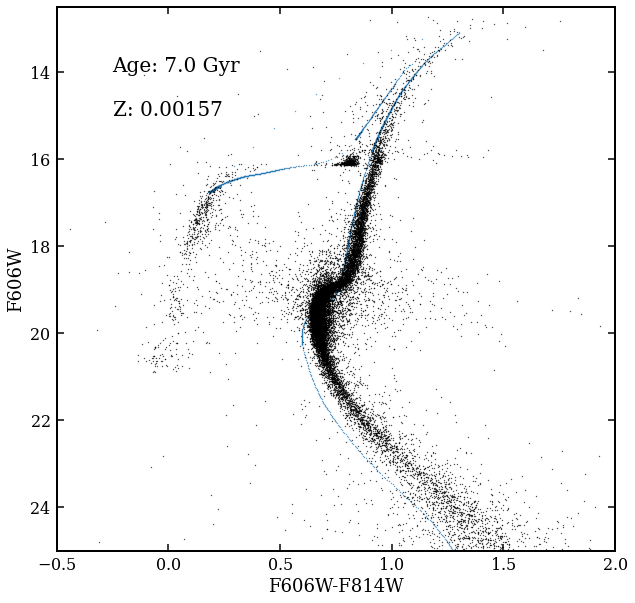

In [32]:
split_final = re.split('z|y|O',basti_file)
age_final = float(split_final[0])/1000.0 #Age of best fit isochrone Gyr
Z_final = float('0.'+split_final[1]) #Z of best fit isochrone
print(age_test,Z_test)

fig1 = figure(1,(10,10))

print(Likelihood_max,Likelihood_min)

plt.scatter(basti_color_final,basti_mag_final,color='C0',s=0.1)
#plt.scatter(basti_color_min,basti_mag_min,color='C1',s=0.1)

plt.scatter(F606-F814,F606,color='k',s=0.1)
#plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.xlim([0.4,1.2])
#plt.ylim([22,15])

plt.xlim([-0.5,2.0])
plt.ylim([25.0,12.5])

plt.text(-0.25,14.0,'Age: '+str(age_final)+' Gyr',fontsize=20)
plt.text(-0.25,15.0,'Z: '+str(Z_final),fontsize=20)

plt.xlabel('F606W-F814W')
plt.ylabel('F606W')
plt.show()

#print(iso_matrix[:,0],iso_matrix[:,1])
#print(np.min(F606),np.max(F606))
#print(np.min(F814),np.max(F814))

# Adding in priors

Okay now I want to add in some priors. To start I suppose it would just be the distance modulus and reddening.

I think what I can do is for each isochrone run an MCMC to find the best-fit reddening and distance modulus for each isochrone than see which best fit returns the maximum likelihood.


In [71]:
#Now I need to add in my priors on the distance modulus and the reddening
#In the paper they addopt uniform priors for all parameters as follows:
#
# age - 10 t0 15 Gyrs
# metallicity - 0.00 to -2.00 dex
# reddening - 0.0 to 1.0 mag
# distance modulus - 12.0 to 16.0 mag
#
#I think what I've written below is the full likelihood function with a uniform prior
#for distance and reddening. The basic way this works is
#
# 1) define prior such that it's 1.0 if you are within the range and -inf if not
# 2) If you are outside the zone your liklihood automatically drops to -inf
# 3) Write the likelihood with the parameters contained in it
# 4) Return the log prior plus the log likelihood, this is the fucntion that emcee takes in
#    and gives the true answers.

def log_prior(theta):
    dist_mod, reddening = theta
    if 0.0 < reddening < 1.0 and 12.0 < dist_mod < 16.0:
        return 0.0
    return -np.inf

#In this case x and y would be the star color (x)  and star (y)

def log_probability(theta, x, y):
    dist_mod, reddening = theta #emcee assumes your prior parameters are in theta
    lp = log_prior(theta)
    
    #Now load in a given isochrone:
    f_basti = np.loadtxt('../Basti_isochrones/'+str(basti_folder)+'/'+basti_file)

    basti_f275w = f_basti[:,6]
    basti_f336w = f_basti[:,7]
    basti_f438w = f_basti[:,9]
    basti_f606w = f_basti[:,12]
    basti_f814w = f_basti[:,15]

    basti_color = (basti_f606w-basti_f814w)+reddening #Here is where our reddening comes into play
    basti_mag = basti_f606w+dist_mod #Here is where the distance modulus comes into play

    obs_cmd_color = x
    obs_cmd_mag = y
    
    chi_color_list, chi_mag_list = [],[]

    for ii in range(len(F606)-1):

        obs_cmd_mag = F606[ii]
        obs_cmd_color = F606[ii]-F814[ii]

        #obs_cmd_mag_err = F606_RMS[ii]
        #obs_cmd_color_err = np.sqrt(F606_RMS[ii]**2.0+F814_RMS[ii]**2.0)

        cmd_dist = np.sqrt((basti_color-(obs_cmd_color))**2.0+(basti_mag-obs_cmd_mag)**2.0) #distance between observed point and isochrone points
        cmd_arg = np.argmin(cmd_dist) #find the point on the 
        chi_mag = (obs_cmd_mag - basti_mag[cmd_arg])
        chi_color = (obs_cmd_color - basti_color[cmd_arg])

        chi_color_list.append(chi_color)
        chi_mag_list.append(chi_mag)

    assert shape(chi_mag_list)==shape(np.array(chi_mag_list)**2.0)

    #Now I need to add in a prior
    Likelihood = -np.sum(np.array(chi_mag_list)**2+np.array(chi_color_list)**2)

    if not np.isfinite(lp):
        return -np.inf
    return lp + Likelihood

In [73]:
#I should just be able to slot this function into emcee and let it rip?


pos = np.array([15.,0.5]) + 1.0e-3*np.random.randn(5, 2) #I think this is an initial guess to give the MCMC
nwalkers, ndim = 5, 2 #I think ndim is the number of free parameters

sampler = emcee.EnsembleSampler(nwalkers,ndim, log_probability, args=(obs_cmd_color, obs_cmd_mag))

sampler.run_mcmc(pos, 500, progress=True)


100%|██████████| 500/500 [25:14<00:00,  3.03s/it]


State([[15.79833998  0.24371147]
 [15.86148159  0.24614273]
 [15.8297078   0.2470839 ]
 [15.76831672  0.2427974 ]
 [15.81455725  0.24327029]], log_prob=[-805.38968325 -805.35091338 -805.23726887 -805.85858621 -805.31589803], blobs=None, random_state=('MT19937', array([4283042801, 2609085307, 3703612296, 1516534932, 2424554704,
       2992919073,  564166192, 1875261868, 3784739333, 1085135752,
       3468740297, 3977946443, 1788614101,  462570823,  818687423,
        826565653, 1996932809, 4109998653, 3414773436, 1128159826,
       2987533749, 4167195020, 1931670649, 3841899694, 1051752398,
        350896524, 3359166189, 3348711675, 4188366542, 1968569082,
       2109585350, 1549522333, 1889250856, 2264306871,  228971144,
       2180316008, 3571809661, 1112667429, 2622801741,  219363515,
       3187588503, 2006360581,   23996398, 1848802984, 3906414926,
       3513325945, 1503352210, 4192460770, 3710209827, 1071994900,
       1668555350, 1303097552, 2222201328, 4114477891, 3190548022,
 

2


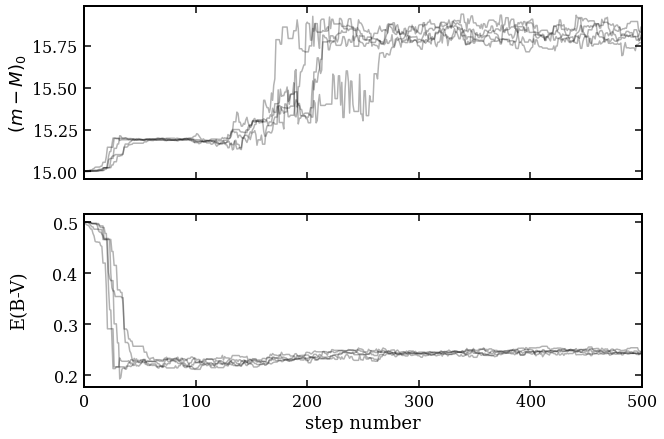

In [74]:
print(ndim)

fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = [r"$(m-M)_{0}$", "E(B-V)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

(2500, 2)


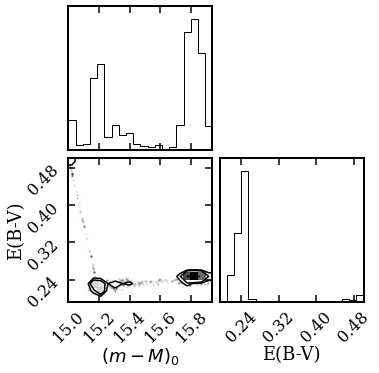

In [75]:
flat_samples = sampler.get_chain(flat=True)
print(flat_samples.shape)

import corner

fig = corner.corner(
    flat_samples, labels=labels
);

In [76]:
samples[-1]

best_fit_modulus = np.median(samples[-1][:,0])
best_fit_reddening = np.median(samples[-1][:,1])

print(best_fit_modulus,best_fit_reddening)

15.814557253335444 0.24371146627435777


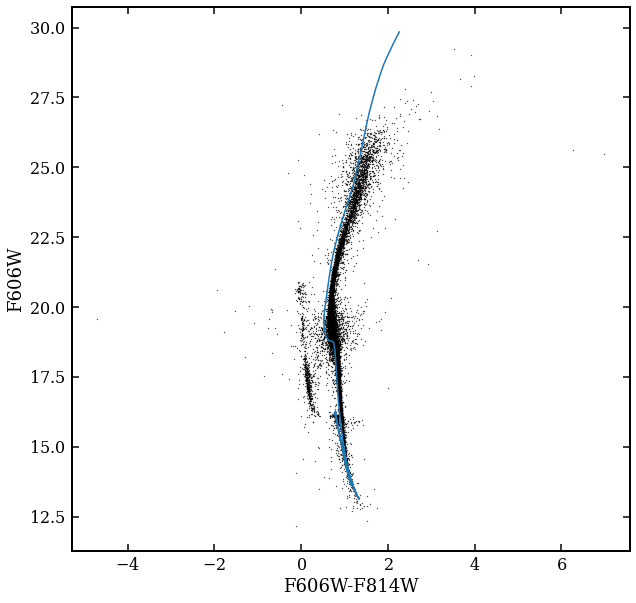

In [77]:
fig1 = figure(1,(10,10))

plt.plot(basti_color,basti_mag,color='C0')
#plt.scatter(basti_color_min,basti_mag_min,color='C1',s=0.1)

plt.scatter(F606-F814,F606,color='k',s=0.1)
#plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.xlim([0.4,1.2])
#plt.ylim([22,15])

#plt.xlim([-0.5,2.0])
#plt.ylim([25.0,12.5])

#plt.text(-0.25,14.0,'Age: '+str(age_final)+' Gyr',fontsize=20)
#plt.text(-0.25,15.0,'Z: '+str(Z_final),fontsize=20)

plt.xlabel('F606W-F814W')
plt.ylabel('F606W')
plt.show()

## Separating out the MPs



In [ ]:
#In theory this works but I think I screwed up the likelihood
#I need to sum ALL of the squared differences

from scipy.spatial.distance import cdist

chi_color_list = np.empty((0,0))
chi_mag_list = np.empty((0,0))

orig_matrix = np.vstack([F606[::10]-F814[::10],F606[::10]]).T
iso_matrix = np.vstack([(basti_f606w-basti_f814w)+0.15,basti_f606w+16]).T

chi_color_list, chi_mag_list = [],[]

for ii in range(len(F606[::10])-1):
    #mag_select = F606_orig[ii]
    #color_select = F606_orig[ii]-F814_orig[ii]
    
    if ii%100 == 0:
        print(ii)
    
    cmd_arg = orig_matrix[ii]-iso_matrix  
    
    chi_color_list = np.concatenate([chi_color_list,cmd_arg[:,0]])
    chi_mag_list = np.concatenate([chi_mag_list,cmd_arg[:,1]])
    
#cmd_dist = cdist(orig_matrix,iso_matrix) #This is incredibly slow and difficult to run
#print(cmd_dist)

#plt.scatter(F606_orig-F814_orig,F606_orig,color='C0',s=0.1)
#plt.scatter(F606-F814,F606,color='k',s=0.1)

#def iso_likelihood(mag_data, color_data, mag_iso, color_iso):
#    from scipy.spatial.distance import cdist
    
#    data_matrix = np.vstack(color_data, mag_data).T
#    iso_matrix = np.vstack(color_iso, mag_iso).T
#    chi_mag = 

In [ ]:
Likelihood = -np.sum(np.array(chi_mag_list)**2+np.array(chi_color_list)**2)
print(Likelihood)

In [99]:
print(np.sum(F606_RMS>0.0))
print(len(F606_RMS))

11545
11545
